In [20]:
print("Hello World")

Hello World


# __________________________________________________________UPDATE_2__________________________________________________________

# 1. Import Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Data

In [27]:
df = pd.read_csv(r"/Users/naren/Library/CloudStorage/OneDrive-MercerUniversity/MERCER UNIVERSITY/SEM 4/Capstone_Group5/PowerBI_ExportedData.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df.replace('unknown', np.nan, inplace=True)
round(df.isnull().sum()/len(df) * 100,2)

age           0.00
job           0.64
marital       0.00
education     4.11
default       0.00
balance       0.00
housing       0.00
loan          0.00
contact      28.80
day           0.00
month         0.00
duration      0.00
campaign      0.00
pdays         0.00
previous      0.00
poutcome     81.75
y             0.00
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(9), object(8)
memory usage: 5.9+ MB


In [33]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28267,35,blue-collar,single,secondary,no,1239,1,0,cellular,29,jan,112,1,195,1,failure,no
491,29,blue-collar,married,secondary,no,1,1,0,NaN,6,may,215,1,-1,0,NaN,no
20655,60,retired,married,secondary,no,781,1,1,cellular,12,aug,128,5,-1,0,NaN,no


# 3. Data Inspection - Null Values

In [36]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

There are  null values in this data set

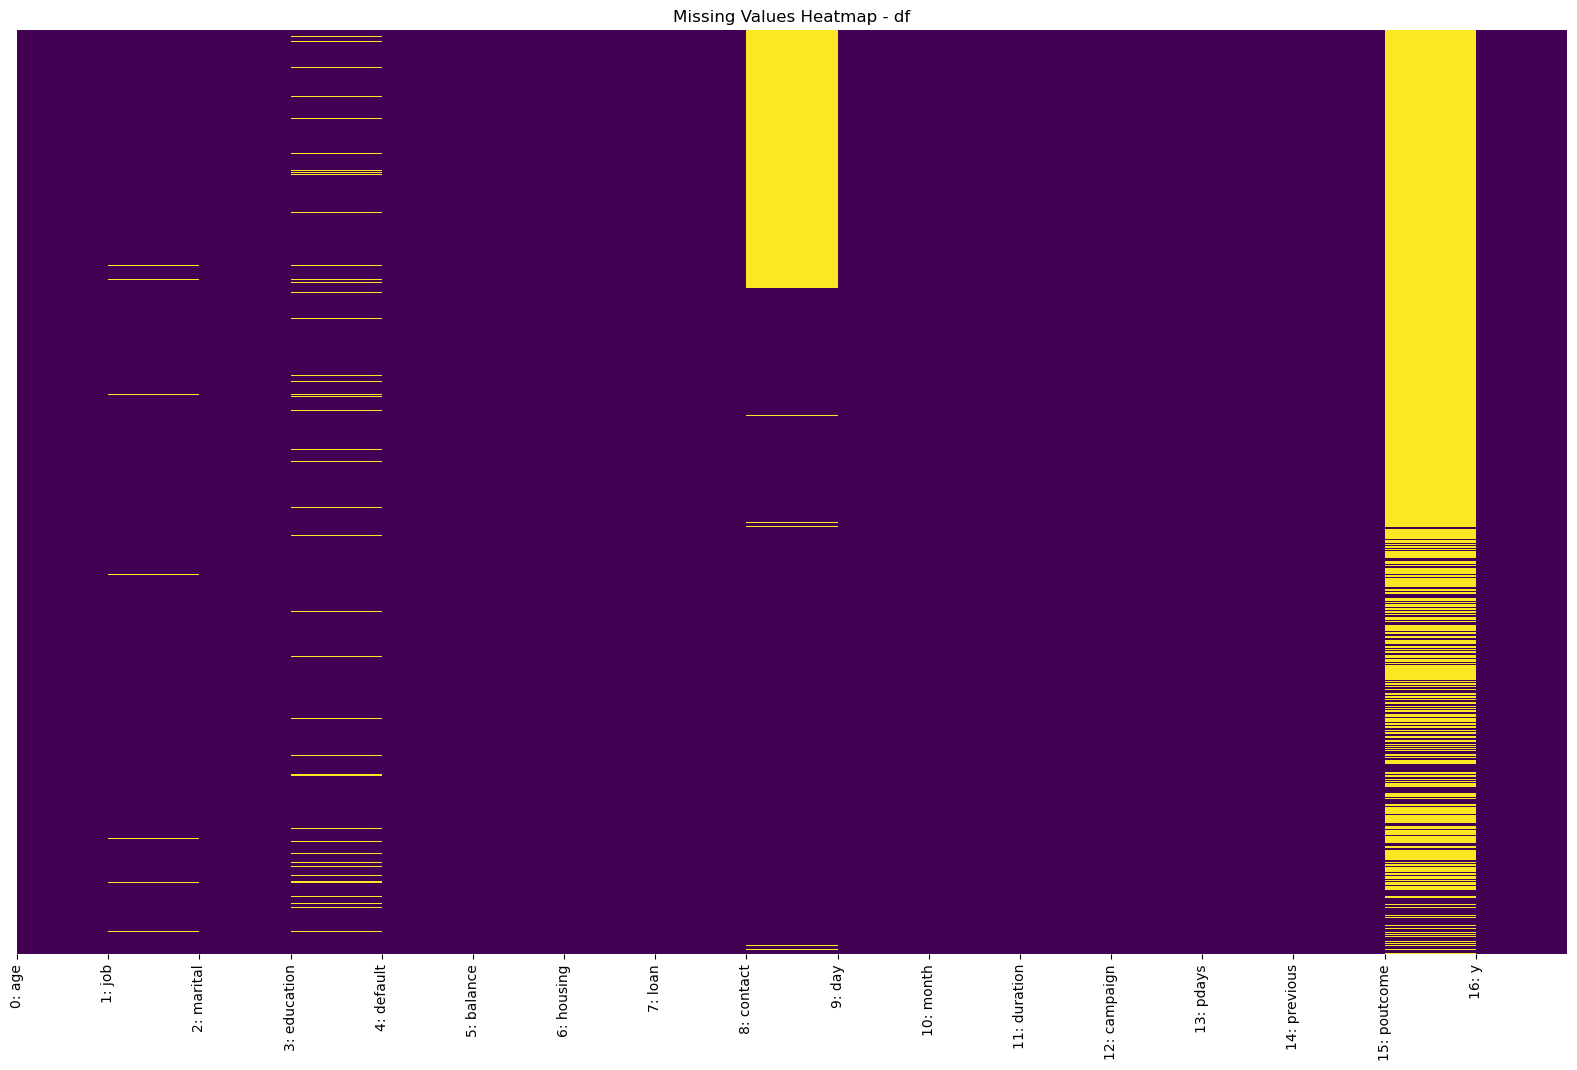

In [14]:
plt.figure(figsize=(20, 12))  # to show all  columns

# Create custom x-axis labels with column index and name
xtick_labels = [f"{i}: {col}" for i, col in enumerate(df.columns)] #make sure we get all 121 columns

# Heatmap of missing values
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)
plt.xticks(ticks=range(len(df.columns)), labels=xtick_labels, rotation=90)
plt.title('Missing Values Heatmap - df')
plt.show()

In [15]:
print("Columns in app_data1 with missing values and their proportions:\n")

for idx, col in enumerate(df.columns):
    null_pct = df[col].isnull().mean() * 100
    if null_pct > 0:
        print(f"{idx:>3}. {col:<30}: {null_pct:.2f}%")

Columns in app_data1 with missing values and their proportions:

  1. job                           : 0.64%
  3. education                     : 4.11%
  8. contact                       : 28.80%
 15. poutcome                      : 81.75%


### 3.1 Data Types

### 3.2 Descriptive Statistics

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### 3.3 Categorical Data

In [38]:
# Get columns of type object
object_columns = df.select_dtypes(include='object')

# Apply value_counts to each object column
for col in object_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print()

Value counts for 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

Value counts for 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for 'education':
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

Value counts for 'default':
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for 'contact':
contact
cellular     29285
telephone     2906
Name: count, dtype: int64

Value counts for 'month':
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

Value counts for 'poutcome':
poutcome
failure    4901
oth

### 3.4 Correlation Matrix

In [31]:
corr_matrix = df.select_dtypes(include='number').corr()  # Use `.corr()` correctly
corr_matrix

,age,balance,housing,loan,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674
housing,-0.185513,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076
loan,-0.015655,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043
day,-0.009120,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000


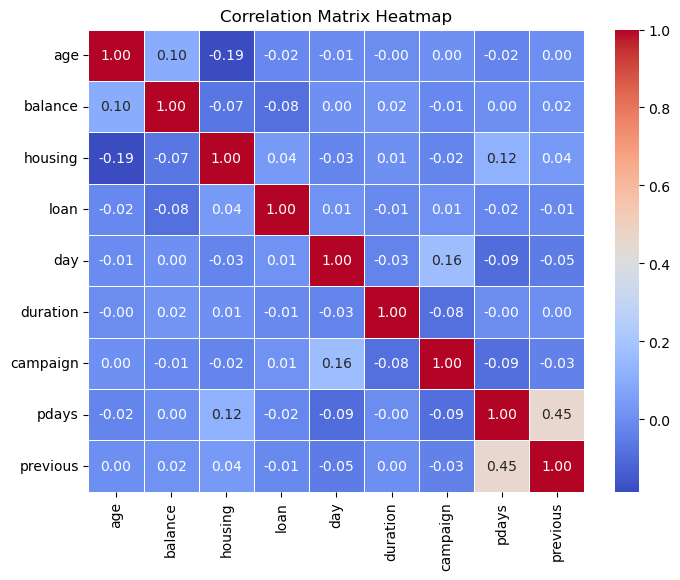

In [33]:
# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
 df['housing'].value_counts()/len(df)

housing
1    0.555838
0    0.444162
Name: count, dtype: float64

In [37]:
 df['loan'].value_counts()/len(df)

loan
0    0.839774
1    0.160226
Name: count, dtype: float64

**In the update_2**

--> we performed data dimension exploration - (decided to drop poutcome with 80% or more null values) and day is too much granular information

--> correlation between variables (pdays and previous are correlated and there might be an interaction between these two terms)

--> null values inspection

--> descriptive stats

In [40]:
df = df.drop(columns=['poutcome','day', ])

# __________________________________________________________UPDATE_3__________________________________________________________

# 4. Outliers_Numeric_Data

In [44]:
df_numeric = df.select_dtypes(include='number')
df_numeric.sample(2)

,age,balance,housing,loan,duration,campaign,pdays,previous
6337,30,-213,1,1,751,1,-1,0
9045,60,8590,0,0,85,1,-1,0


## 4.1 find the outliers

In [47]:
def get_upper_outlier_thresholds(df):
    thresholds = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        thresholds[col] = upper
    return thresholds

# Apply to your DataFrame
upper_thresholds = get_upper_outlier_thresholds(df_numeric)

# Print the results
for col, threshold in upper_thresholds.items():
    print(f"Outliers in '{col}' are values greater than: {threshold}")

Outliers in 'age' are values greater than: 70.5
Outliers in 'balance' are values greater than: 3462.0
Outliers in 'housing' are values greater than: 2.5
Outliers in 'loan' are values greater than: 0.0
Outliers in 'duration' are values greater than: 643.0
Outliers in 'campaign' are values greater than: 6.0
Outliers in 'pdays' are values greater than: -1.0
Outliers in 'previous' are values greater than: 0.0


In [49]:
df['age'].max()

95

In [51]:
# Calculate percentage of values above outlier thresholds for each column
outlier_percentages = {
    col: (df[col] > upper_thresholds[col]).sum() / len(df[col]) * 100
    for col in upper_thresholds
}
# Print the results
for col, pct in outlier_percentages.items():
    print(f"{round(pct,2)}% of values in '{col}' are upper outliers.")

1.08% of values in 'age' are upper outliers.
10.42% of values in 'balance' are upper outliers.
0.0% of values in 'housing' are upper outliers.
16.02% of values in 'loan' are upper outliers.
7.16% of values in 'duration' are upper outliers.
6.78% of values in 'campaign' are upper outliers.
18.26% of values in 'pdays' are upper outliers.
18.26% of values in 'previous' are upper outliers.


In [53]:
# Calculate percentage of values greater than 16 - campaign
percentage = (df['campaign'][df['campaign'] > 16].count() / df['campaign'].count()) * 100
print(f"Percentage of values greater than 16 in campaign : {percentage:.2f}%")

Percentage of values greater than 16 in campaign : 1.00%


In [55]:
# Contingency table (frequency count)0
contingency_table = df['previous'].value_counts().sort_values(ascending= False).head(16)
print(contingency_table)

previous
0     36954
1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
Name: count, dtype: int64


In [57]:
# Calculate percentage of values greater than 16 - previous
percentage = (df['previous'][df['previous'] > 16].count() / df['previous'].count()) * 100

print(f"Percentage of values greater than 16 in previous : {percentage:.2f}%")

Percentage of values greater than 16 in previous : 0.21%


In [59]:
# Step 1: Replace 'campaign' values > 16 with the median
median_value = df['campaign'].median()
df['campaign'] = df['campaign'].apply(lambda x: median_value if x > 16 else x)

# Step 2: Drop rows where 'previous' > 16
df = df[df['previous'] <= 16]

In [61]:
df['previous_pdays_interaction'] = df['previous'] * df['pdays']

In [63]:
df = df.drop(columns=['pdays','previous'])

# 5. Data Normalization Min_Max Scaler (Numeric Columns)

In [66]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
# Apply scaling to the numeric columns
df_numeric = df.select_dtypes(include='number').columns
df[df_numeric] = scaler.fit_transform(df[df_numeric])

In [70]:
df.sample(1)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,previous_pdays_interaction
27987,0.545455,management,married,primary,no,0.073984,0.0,0.0,cellular,jan,0.076047,0.066667,no,0.0


# 6. Categorical Variable Transformation

In [75]:
#df = pd.get_dummies(df,drop_first= True)

In [77]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45116 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         45116 non-null  float64
 1   balance                     45116 non-null  float64
 2   housing                     45116 non-null  float64
 3   loan                        45116 non-null  float64
 4   duration                    45116 non-null  float64
 5   campaign                    45116 non-null  float64
 6   previous_pdays_interaction  45116 non-null  float64
 7   job_blue-collar             45116 non-null  bool   
 8   job_entrepreneur            45116 non-null  bool   
 9   job_housemaid               45116 non-null  bool   
 10  job_management              45116 non-null  bool   
 11  job_retired                 45116 non-null  bool   
 12  job_self-employed           45116 non-null  bool   
 13  job_services                45116 no

**In update 3**

--> transformation data - mapping numeric categorical to object type categorical

--> identify outliers in the numerical data, we dropped outliers in the case of **previous** and in the case of **campaign** we replaced with median 

--> % of the columns that  have values  greater than or equal to outlier

--> Used min max scaler to normalize numerical data

--> #pd.get_dummies(df1): Converts categorical variables into one-hot encoded columns.
drop_first=True: Drops the first category of each categorical variable to avoid dummy variable trap (which helps in regression models to prevent multicollinearity). optional

In [73]:
# Export to CSV
file_path = "/Users/naren/Library/CloudStorage/OneDrive-MercerUniversity/MERCER UNIVERSITY/Capstone_Group5/update_4.csv"
df.to_csv(file_path, index = False)

print(f"transformed data is saved to {file_path}")

transformed data is saved to /Users/naren/Library/CloudStorage/OneDrive-MercerUniversity/MERCER UNIVERSITY/Capstone_Group5/update_4.csv


# UPDATE_4